# Individual project 1

# 1. Compare the data to the overall military spending of the all 10 countries

For the data it will be used the "SIPRI Milex data 1949-2017" dataset.
As documentation says: 
"The SIPRI Military Expenditure Database includes data for 172 countries for the period 1949-2017... "

For the first question the excel sheet "Current USD" will be used. This sheet refers to: 
"Data for military expenditure by country in current US$ (millions), presented according to calendar year."

The years that will be used are from 2010 to 2016 inclusive.

The countries to be selected: US, China, Russia, Germany, UK, France, Italy, Saudi Arabia, S. Korea, Israel

It is important to observe that most of the values for China and Russia are estimated values by SIPRI.

* Import the excel file and the needed packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.ExcelFile('SIPRI-Milex-data-1949-2017.xlsx')
print(data.sheet_names)

['Front page', 'Regional totals', 'Local currency financial years', 'Local currency calendar years', 'Constant (2016) USD', 'Current USD', 'Share of GDP', 'Per capita', 'Share of Govt. spending', 'Footnotes']


 * Defining the first DataFrame as "Military spending in terms of current USD $(Millions)"
     (data.parse: select the sheet from the excel document to be used)
 * Inspecting and cleaning the data frame

In [2]:
df1=data.parse('Current USD',header=5)
df1.head(7)
type(df1)
df1=df1.drop(df1.iloc[:,1:63],axis=1)
df1=df1.set_index('Country')
df1=df1.iloc[:,0:7]
#df1.head(11)
#df1.index.values

* Selecting the countries to be used and sorting them by alphabetical order

In [3]:
df1=df1.loc[['USA','China, P.R.','Russian Federation', 'Germany', 'UK', 'France', 'Italy', 'Saudi Arabia', 'Korea, South', 'Israel'
            ],:]
df1=df1.sort_index()
df1.head(10)

,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,
"China, P.R.",115712,137967,157390,179880,200772,214093,216031
France,61781.7,64600.9,60035.2,62417.1,63613.6,55342.1,57358.4
Germany,46255.5,48140.3,46470.9,45930.5,46102.7,39812.6,41579.5
Israel,14573.2,16318.5,15545.7,17302.2,18481.1,16963.2,14782.8
Italy,36032.3,38130,33732.8,33891.9,31572.4,25294.6,28205.8
"Korea, South",28175.2,30991.7,31951.8,34136.6,37552.3,36570.8,36934.4
Russian Federation,58720.2,70237.5,81469.4,88352.9,84696.5,66418.7,69245.3
Saudi Arabia,45244.5,48530.9,56497.9,67020,80762.4,87185.9,63672.8
UK,58082.8,60270.4,58495.7,56861.8,59182.9,53862.2,48118.9


* Creating a first plot to compare the spending of each country by year.
( T: used to transpose the dataframe because python reads rows in the x axis)

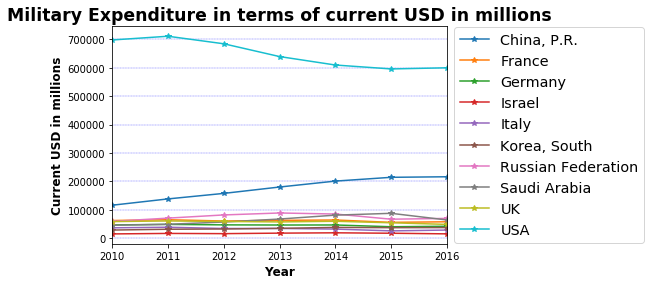

In [4]:
df1.T.plot(marker='*')
plt.ylabel('Current USD in millions',fontsize='large',fontweight="bold")
plt.xlabel('Year',fontsize='large',fontweight="bold")
plt.title('Military Expenditure in terms of current USD in millions',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
fig_size = plt.rcParams["figure.figsize"]
#print(fig_size) #[6.0,4.0]

fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

As it can be observed, USA spending is much bigger than the spending of the other 9 countries, impeding us to observe with precision their values and differences. 

It is important to see how USA reaches more than 700000 millions of USD by 2011 and then starts to decrease staying around 600000 millions of USD for 2016. China that follows USA has its maximum in 2016 with only a little more than 200 000 millions of USD. This is about 1/3 of what USA spent that year.

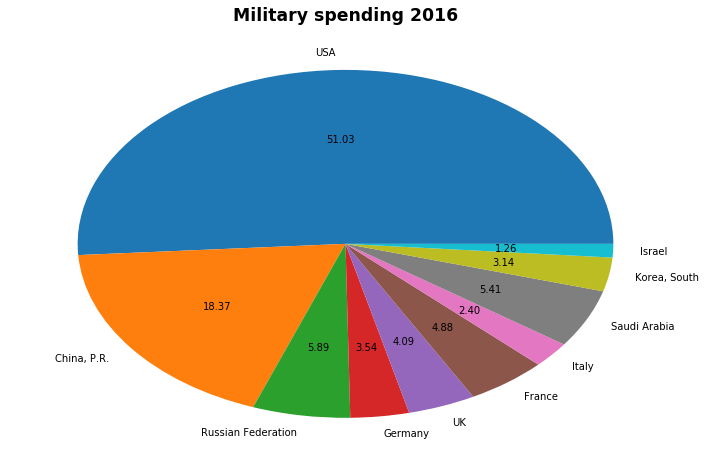

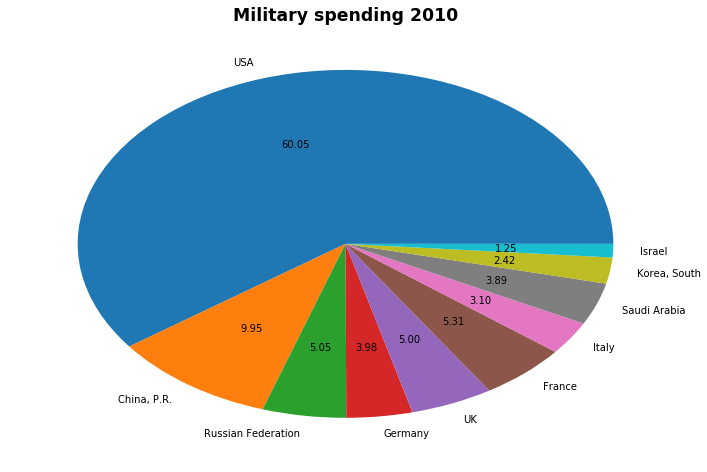

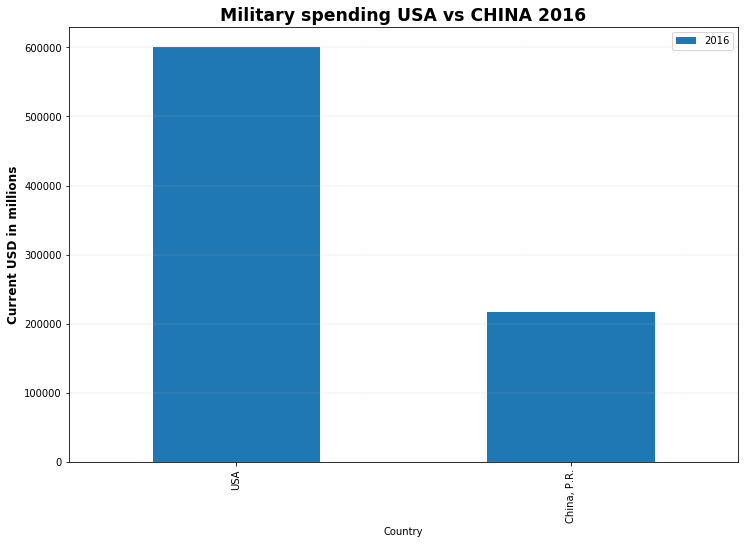

In [5]:
df1_usaperc=df1.loc[['USA','China, P.R.','Russian Federation', 'Germany', 'UK', 'France', 'Italy', 'Saudi Arabia', 'Korea, South', 'Israel'
            ],[2016]]
plt.figure();
plt.pie(x=df1_usaperc,labels=['USA','China, P.R.','Russian Federation', 'Germany', 'UK', 'France', 'Italy', 'Saudi Arabia', 'Korea, South', 'Israel'
            ],autopct='%.2f')
plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.title('Military spending 2016',fontsize='xx-large',fontweight="extra bold")
plt.show()
fig_size = plt.rcParams["figure.figsize"]
#print(fig_size) #[6.0,4.0]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size


df1_usaperc2010=df1.loc[['USA','China, P.R.','Russian Federation', 'Germany', 'UK', 'France', 'Italy', 'Saudi Arabia', 'Korea, South', 'Israel'
            ],[2010]]
plt.figure();
plt.pie(x=df1_usaperc2010,labels=['USA','China, P.R.','Russian Federation', 'Germany', 'UK', 'France', 'Italy', 'Saudi Arabia', 'Korea, South', 'Israel'
            ],autopct='%.2f')
plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.title('Military spending 2010',fontsize='xx-large',fontweight="extra bold")
plt.show()
fig_size = plt.rcParams["figure.figsize"]
#print(fig_size) #[6.0,4.0]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df1_usachina=df1.loc[['USA','China, P.R.'],[2016]]
plt.figure();
df1_usachina.plot(kind='bar')
plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.ylabel('Current USD in millions',fontsize='large',fontweight="bold")
plt.title('Military spending USA vs CHINA 2016',fontsize='xx-large',fontweight="extra bold")
plt.show()


* Creating a new data frame and a plot, without USA to better compare the other countries

In [6]:
df1_b=df1.loc[['China, P.R.','Russian Federation', 'Germany', 'UK', 'France', 'Italy', 'Saudi Arabia', 'Korea, South', 'Israel'
            ],:]
df1_b=df1_b.sort_index()
df1_b.head(10)

,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,
"China, P.R.",115712,137967,157390,179880,200772,214093,216031
France,61781.7,64600.9,60035.2,62417.1,63613.6,55342.1,57358.4
Germany,46255.5,48140.3,46470.9,45930.5,46102.7,39812.6,41579.5
Israel,14573.2,16318.5,15545.7,17302.2,18481.1,16963.2,14782.8
Italy,36032.3,38130,33732.8,33891.9,31572.4,25294.6,28205.8
"Korea, South",28175.2,30991.7,31951.8,34136.6,37552.3,36570.8,36934.4
Russian Federation,58720.2,70237.5,81469.4,88352.9,84696.5,66418.7,69245.3
Saudi Arabia,45244.5,48530.9,56497.9,67020,80762.4,87185.9,63672.8
UK,58082.8,60270.4,58495.7,56861.8,59182.9,53862.2,48118.9


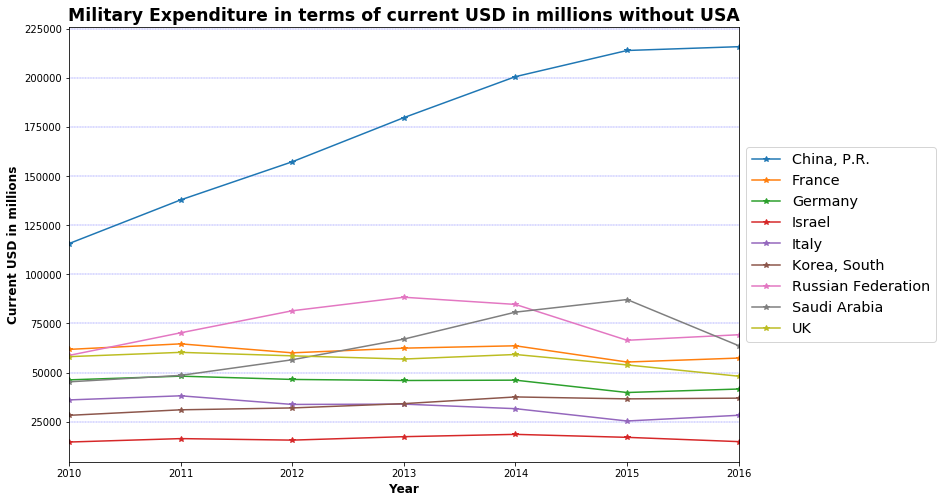

In [7]:
#df1_b.describe()
df1_b.T.plot(marker='*')
plt.ylabel('Current USD in millions',fontsize='large',fontweight="bold")
plt.xlabel('Year',fontsize='large',fontweight="bold")
plt.title('Military Expenditure in terms of current USD in millions without USA',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)

fig_size = plt.rcParams["figure.figsize"]
#print(fig_size) #[6.0,4.0]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

 The plot without USA shows a better comparison of the other countries, but still if we compare China (About 225000-200000 millions of USD for 2016) with Israel (less than 25000 millions of USD for 2016) it is not so precise. 

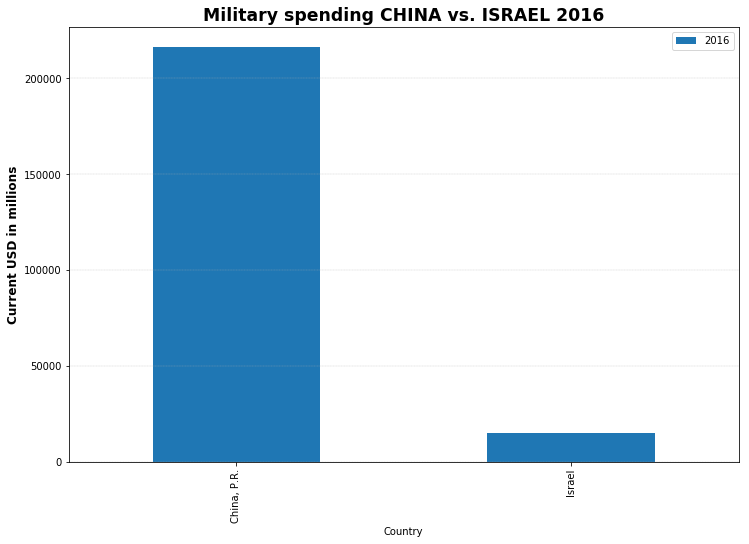

In [8]:
df1_chinaisrael=df1.loc[['China, P.R.','Israel'],[2016]]
plt.figure();
df1_chinaisrael.plot(kind='bar')
plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.title('Military spending CHINA vs. ISRAEL 2016',fontsize='xx-large',fontweight="extra bold")
plt.ylabel('Current USD in millions',fontsize='large',fontweight="bold")
plt.show()
fig_size = plt.rcParams["figure.figsize"]


* Creating a new data frame and a plot, without USA nor China to better compare the other countries

In [9]:
df1_c=df1.loc[['Russian Federation', 'Germany', 'UK', 'France', 'Italy', 'Saudi Arabia', 'Korea, South', 'Israel'
            ],:]
df1_c=df1_c.sort_index()
df1_c.head(11)

,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,
France,61781.7,64600.9,60035.2,62417.1,63613.6,55342.1,57358.4
Germany,46255.5,48140.3,46470.9,45930.5,46102.7,39812.6,41579.5
Israel,14573.2,16318.5,15545.7,17302.2,18481.1,16963.2,14782.8
Italy,36032.3,38130,33732.8,33891.9,31572.4,25294.6,28205.8
"Korea, South",28175.2,30991.7,31951.8,34136.6,37552.3,36570.8,36934.4
Russian Federation,58720.2,70237.5,81469.4,88352.9,84696.5,66418.7,69245.3
Saudi Arabia,45244.5,48530.9,56497.9,67020,80762.4,87185.9,63672.8
UK,58082.8,60270.4,58495.7,56861.8,59182.9,53862.2,48118.9


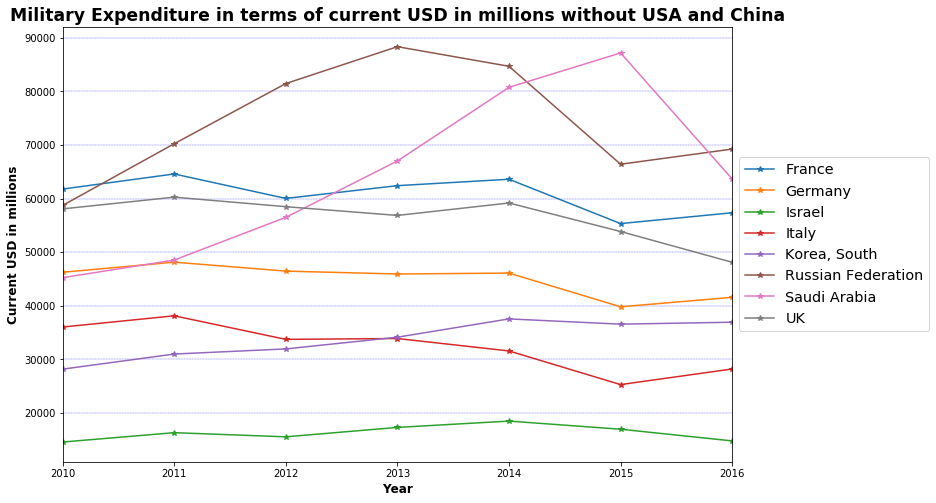

In [10]:
#df1_c.describe()
df1_c.T.plot(marker='*')
plt.ylabel('Current USD in millions',fontsize='large',fontweight="bold")
plt.xlabel('Year',fontsize='large',fontweight="bold")
plt.title('Military Expenditure in terms of current USD in millions without USA and China',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
fig_size = plt.rcParams["figure.figsize"]
#print(fig_size) #[6.0,4.0]

fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

The last plot is a much fair comparison of the other eight countries. Following China are Saudi Arabia and Russia that started increasing their production until 2015 and 2013 respectively and decreased. The other six countries have a more stable spending.

It can be concluded that USA has been decreasing their spending from 2010 to 2016 but is still about 30 times more than the spending from the last in the list. Israel.

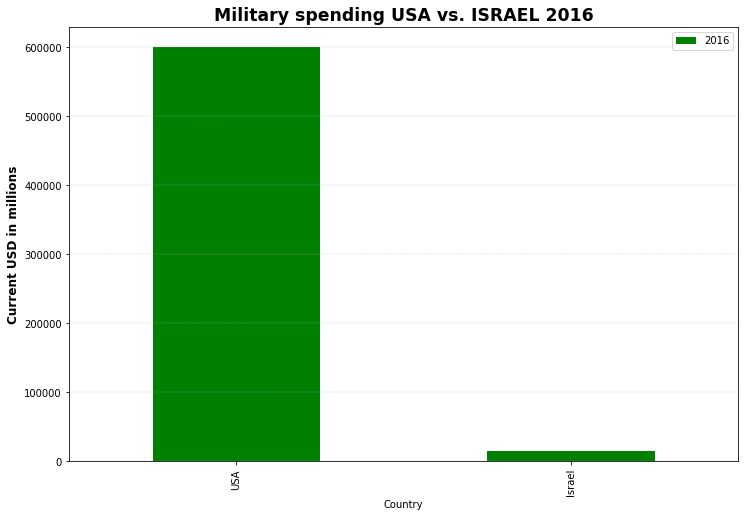

In [11]:
df1_chinaisrael=df1.loc[['USA','Israel'],[2016]]
plt.figure();
df1_chinaisrael.plot(kind='bar',color='g')
plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.ylabel('Current USD in millions',fontsize='large',fontweight="bold")
plt.title('Military spending USA vs. ISRAEL 2016',fontsize='xx-large',fontweight="extra bold")
plt.show()
fig_size = plt.rcParams["figure.figsize"]

In [12]:
df1[2016].sort_values(ascending=False)

Country
USA                    600106
China, P.R.            216031
Russian Federation    69245.3
Saudi Arabia          63672.8
France                57358.4
UK                    48118.9
Germany               41579.5
Korea, South          36934.4
Italy                 28205.8
Israel                14782.8
Name: 2016, dtype: object

# 2. Compare the data (military spending) to that country’s GDP


The Military spending is already imported as df1. 

In [13]:
df1.head(10)

,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,
"China, P.R.",115712,137967,157390,179880,200772,214093,216031
France,61781.7,64600.9,60035.2,62417.1,63613.6,55342.1,57358.4
Germany,46255.5,48140.3,46470.9,45930.5,46102.7,39812.6,41579.5
Israel,14573.2,16318.5,15545.7,17302.2,18481.1,16963.2,14782.8
Italy,36032.3,38130,33732.8,33891.9,31572.4,25294.6,28205.8
"Korea, South",28175.2,30991.7,31951.8,34136.6,37552.3,36570.8,36934.4
Russian Federation,58720.2,70237.5,81469.4,88352.9,84696.5,66418.7,69245.3
Saudi Arabia,45244.5,48530.9,56497.9,67020,80762.4,87185.9,63672.8
UK,58082.8,60270.4,58495.7,56861.8,59182.9,53862.2,48118.9


Now it is needed the data for each country's GDP. The dataset comes from World Bank "w_gdp.xls". The sheet's name is "Data"

The data is in current USD and it is needed in millions of current USD

* Importing the GDP in fixed values and cleaning

In [14]:
data2=pd.ExcelFile('w_gdp.xls')
#print(data2.sheet_names)
df2_a=data2.parse('Data',header=2)
df2_a.head(7)
df2_a=df2_a.drop(df2_a.loc[:,'1960':'2009'],axis=1)
df2_a=df2_a.drop(df2_a.loc[:,'2017':],axis=1)
df2_a=df2_a.drop(df2_a.loc[:,'Country Code':'Indicator Code'],axis=1)
df2_a=df2_a.set_index('Country Name')
#df2_a.head(10)
#df2_a.index.values

In [15]:
df2_a=df2_a.loc[['United States','China','Russian Federation', 'Germany', 'United Kingdom', 'France', 'Italy', 'Saudi Arabia', 'Korea, Rep.', 'Israel'
            ],:]
df2_a=df2_a.sort_index()
df2_a=df2_a/1000000
df2_a.head(10)
#df2_a.index.values

,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,
China,6.100620e+06,7.572554e+06,8.560547e+06,9.607224e+06,1.048237e+07,1.106467e+07,1.119915e+07
France,2.646837e+06,2.862680e+06,2.681416e+06,2.808511e+06,2.849305e+06,2.433562e+06,2.465454e+06
Germany,3.417095e+06,3.757698e+06,3.543984e+06,3.752514e+06,3.890607e+06,3.375611e+06,3.477796e+06
Israel,2.336095e+05,2.616285e+05,2.572966e+05,2.924892e+05,3.084170e+05,2.990964e+05,3.177448e+05
Italy,2.125058e+06,2.276292e+06,2.072823e+06,2.130491e+06,2.151733e+06,1.832347e+06,1.858913e+06
"Korea, Rep.",1.094499e+06,1.202464e+06,1.222807e+06,1.305605e+06,1.411334e+06,1.382764e+06,1.411246e+06
Russian Federation,1.524916e+06,2.051662e+06,2.210257e+06,2.297128e+06,2.063663e+06,1.365864e+06,1.283163e+06
Saudi Arabia,5.282072e+05,6.712388e+05,7.359748e+05,7.466471e+05,7.563503e+05,6.517573e+05,6.464384e+05
United Kingdom,2.441173e+06,2.619700e+06,2.662085e+06,2.739819e+06,3.022828e+06,2.885570e+06,2.647899e+06


In [16]:
df2_a['2016'].sort_values(ascending=False)

Country Name
United States         1.862448e+07
China                 1.119915e+07
Germany               3.477796e+06
United Kingdom        2.647899e+06
France                2.465454e+06
Italy                 1.858913e+06
Korea, Rep.           1.411246e+06
Russian Federation    1.283163e+06
Saudi Arabia          6.464384e+05
Israel                3.177448e+05
Name: 2016, dtype: float64

* Comparing the data in fixed values.

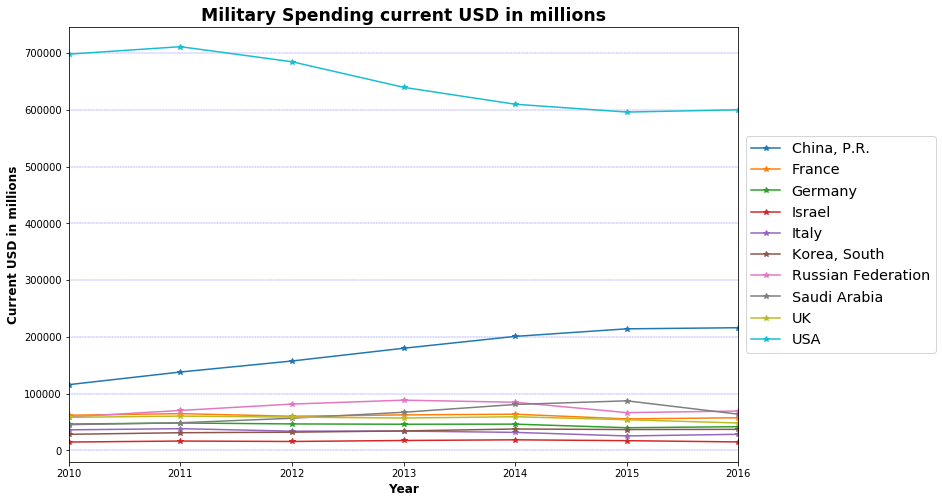

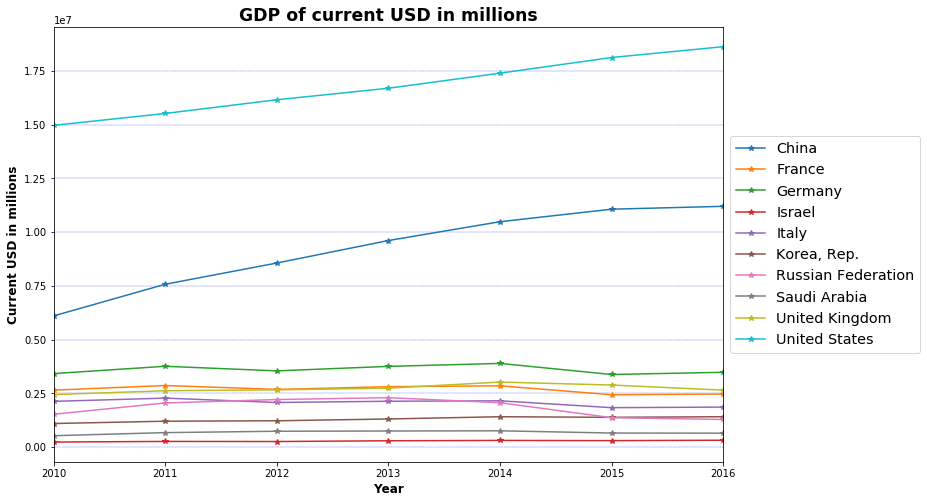

In [17]:
df1.T.plot(marker='*')
plt.ylabel('Current USD in millions',fontsize='large',fontweight="bold")
plt.xlabel('Year',fontsize='large',fontweight="bold")
plt.title('Military Spending current USD in millions',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)

df2_a.T.plot(marker='*')
plt.ylabel('Current USD in millions',fontsize='large',fontweight="bold")
plt.xlabel('Year',fontsize='large',fontweight="bold")
plt.title('GDP of current USD in millions',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.show()

It is difficult to compare the two plots because GDP is much higher than military spending.For 2010 military spending for USA is almost in it highest value and the GDP is in it's lowest value. Comparing them it is possible to observe that it is not possible to show a clear result. 

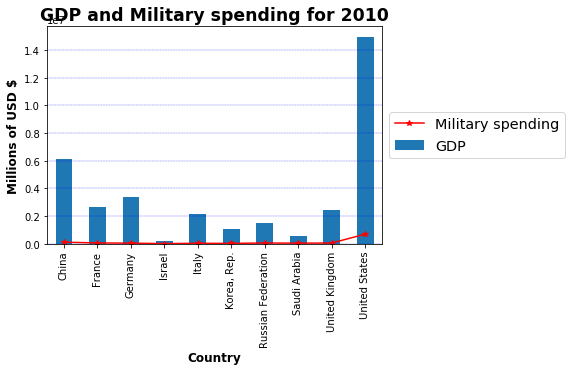

In [18]:
plt.figure();
df1[2010].T.plot(marker='*',label="Military spending",color='red')
df2_a['2010'].plot(kind='bar',label='GDP')
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.title('GDP and Military spending for 2010',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.ylabel('Millions of USD $',fontsize='large',fontweight="bold")
plt.xlabel('Country',fontsize='large',fontweight="bold")
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

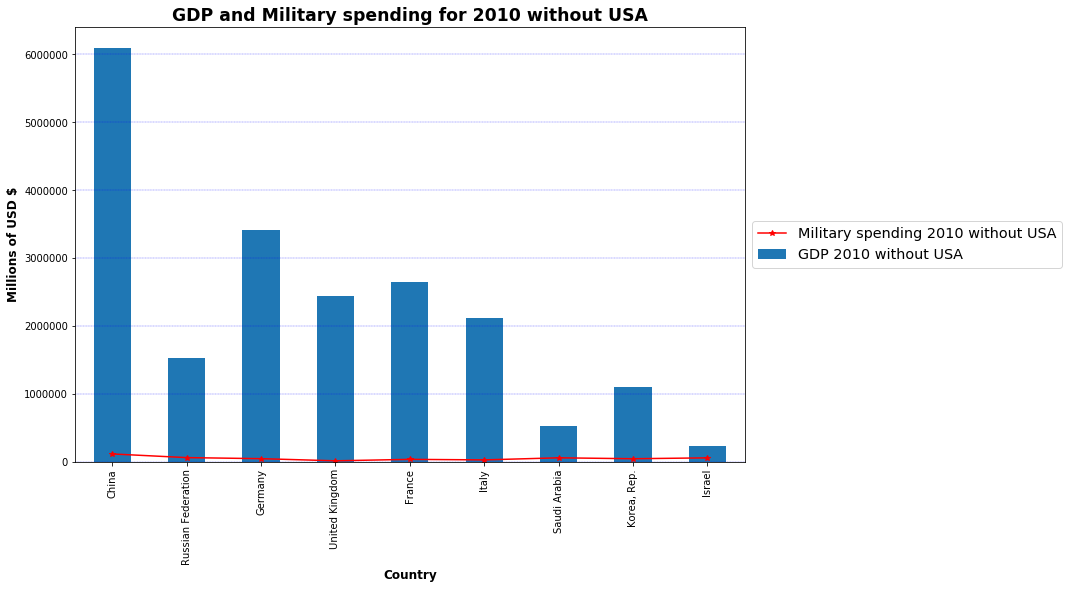

In [19]:
df2_a_usa=df2_a.loc[['China','Russian Federation', 'Germany', 'United Kingdom', 'France', 'Italy', 'Saudi Arabia', 'Korea, Rep.', 'Israel'],:]
plt.figure();
df1_b[2010].T.plot(marker='*', label="Military spending 2010 without USA",color='red')
df2_a_usa['2010'].plot(kind='bar',label='GDP 2010 without USA')
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.title('GDP and Military spending for 2010 without USA',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.ylabel('Millions of USD $',fontsize='large',fontweight="bold")
plt.xlabel('Country',fontsize='large',fontweight="bold")

fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

Still it is difficult to appreciate something at the previous plot. By eliminating China hopefully the plot will be more easy to understand.

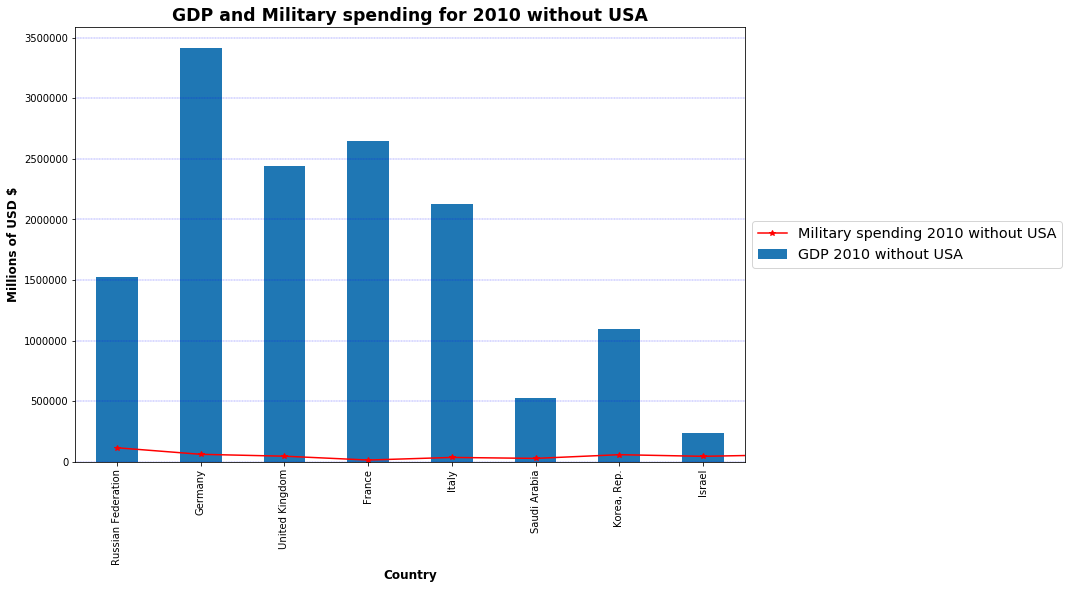

In [20]:
df2_a_china=df2_a.loc[['Russian Federation', 'Germany', 'United Kingdom', 'France', 'Italy', 'Saudi Arabia', 'Korea, Rep.', 'Israel'],:]
plt.figure();
df1_b[2010].T.plot(marker='*', label="Military spending 2010 without USA",color='red')
df2_a_china['2010'].plot(kind='bar',label='GDP 2010 without USA')
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.title('GDP and Military spending for 2010 without USA',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.ylabel('Millions of USD $',fontsize='large',fontweight="bold")
plt.xlabel('Country',fontsize='large',fontweight="bold")

fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

It is nicier but a better way to compare the countries would be by the percentage of GDP spent in military spending.

The data will be used from the sheet "Share of GDP" of the SIPRI file which refers to: 
"Data for military expenditure by country as a share of GDP, presented according to calendar year."

The same years and countries from question 1 will be used.

Most of the values for China and Russia are still estimated values by SIPRI.

* Defining the DataFrame (Military Expectancy in %GDP) and cleaning it.

In [21]:
df2=data.parse('Share of GDP',header=5)
df2.head(11)
type(df2)
df2=df2.drop(df2.iloc[:,1:63],axis=1)
df2=df2.set_index('Country')
df2=df2.iloc[:,0:7]
df2=df2*100

#df2.head(7)
#df2.index.values
df2=df2.loc[['USA','China, P.R.','Russian Federation', 'Germany', 'UK', 'France', 'Italy', 'Saudi Arabia', 'Korea, South', 'Israel'
            ],:]
df2=df2.sort_index()
df2.head(11)

,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,
"China, P.R.",1.89671,1.82193,1.83856,1.87233,1.91534,1.93492,1.93061
France,2.33417,2.25666,2.23894,2.22243,2.2326,2.27422,2.32702
Germany,1.35365,1.28111,1.31126,1.22399,1.18497,1.17947,1.19585
Israel,6.23822,6.23733,6.04196,5.91545,5.99228,5.67026,4.65413
Italy,1.69559,1.67509,1.62738,1.5908,1.4673,1.38051,1.51768
"Korea, South",2.57425,2.57735,2.61298,2.61462,2.66077,2.64476,2.61832
Russian Federation,3.81623,3.45696,3.75134,3.94413,4.10418,4.85134,5.50376
Saudi Arabia,8.58837,7.24876,7.69772,9.004,10.7136,13.4962,9.90648
UK,2.39055,2.31025,2.21072,2.09088,1.97213,1.88258,1.83868


When comparing the military spengind in terms of % of GDP, it can be observed that Saudi Arabia is the country that invests the most of their GDP in military spending, reaching almost 14% by 2015 and then decreasing to around 10% in 2016. Also it is appreciated how about 6 countries maintain their investement around 1-3%. If these 6 countries are separated it is better appreciated the countries fluctuations.

It can also be observed the most part of the countries have been decreasing or maintaining their percentage of GDP spent from one year to another (in the last years) in military spending except the Russian Federation that increased their investment.

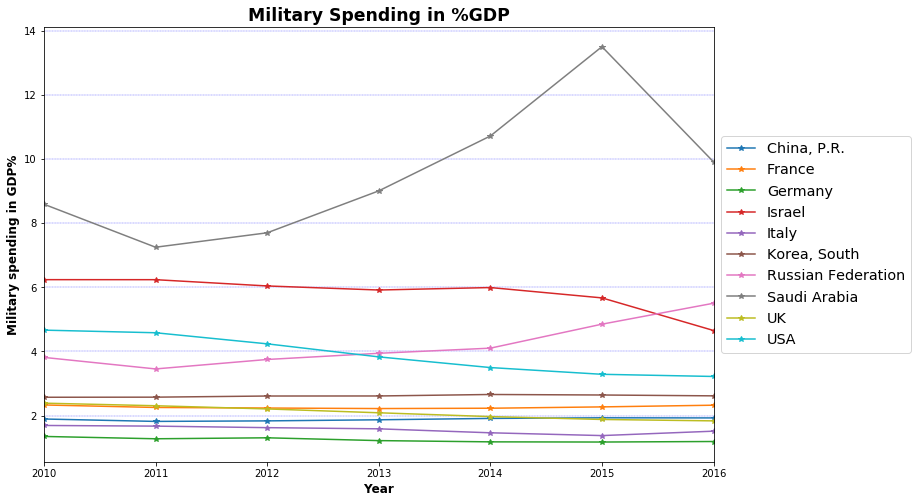

In [22]:
df2.T.plot(marker='*')
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.ylabel('Military spending in GDP%',fontsize='large',fontweight="bold")
plt.xlabel('Year',fontsize='large',fontweight="bold")
plt.title('Military Spending in %GDP',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.show()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size


In [25]:
df2_b=df2.loc[['China, P.R.', 'Germany', 'UK', 'France', 'Italy', 'Korea, South'
            ],:]
df2_b=df2_b.sort_index()

df2_b.head(11)

,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,
"China, P.R.",1.89671,1.82193,1.83856,1.87233,1.91534,1.93492,1.93061
France,2.33417,2.25666,2.23894,2.22243,2.2326,2.27422,2.32702
Germany,1.35365,1.28111,1.31126,1.22399,1.18497,1.17947,1.19585
Italy,1.69559,1.67509,1.62738,1.5908,1.4673,1.38051,1.51768
"Korea, South",2.57425,2.57735,2.61298,2.61462,2.66077,2.64476,2.61832
UK,2.39055,2.31025,2.21072,2.09088,1.97213,1.88258,1.83868


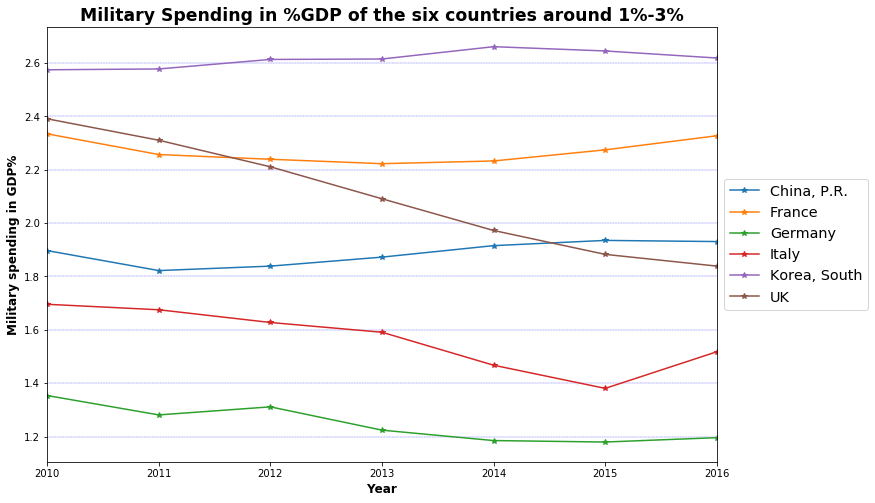

In [26]:
df2_b.T.plot(marker='*')
plt.ylabel('Military spending in GDP%',fontsize='large',fontweight="bold")
plt.xlabel('Year',fontsize='large',fontweight="bold")
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.title('Military Spending in %GDP of the six countries around 1%-3%',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.show()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

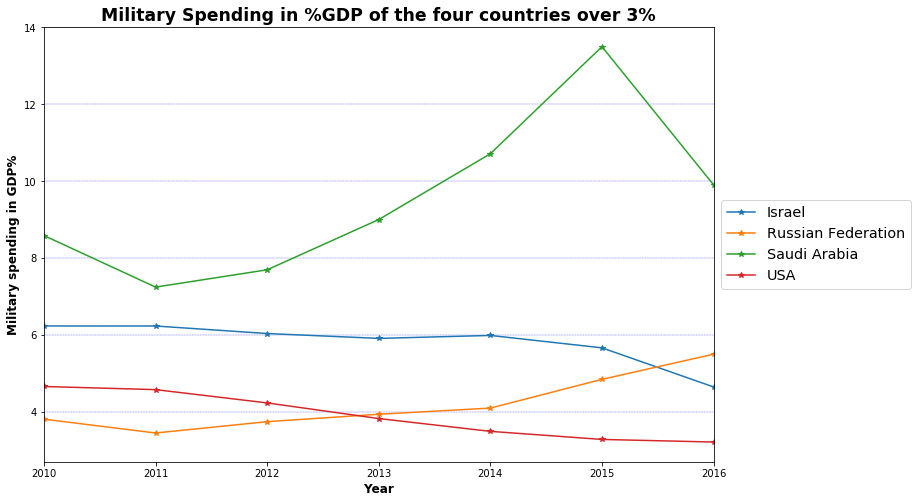

In [27]:
df2_c=df2.loc[['Israel','Russian Federation','Saudi Arabia','USA'],:]
df2_c=df2_c.sort_index()
df2_c.head(11)

df2_c.T.plot(marker='*')
plt.ylabel('Military spending in GDP%',fontsize='large',fontweight="bold")
plt.xlabel('Year',fontsize='large',fontweight="bold")
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.title('Military Spending in %GDP of the four countries over 3%',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.show()

fig_size = plt.rcParams["figure.figsize"]
#print(fig_size) #[6.0,4.0]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Now let's compare the countries military spending in % GDP by year

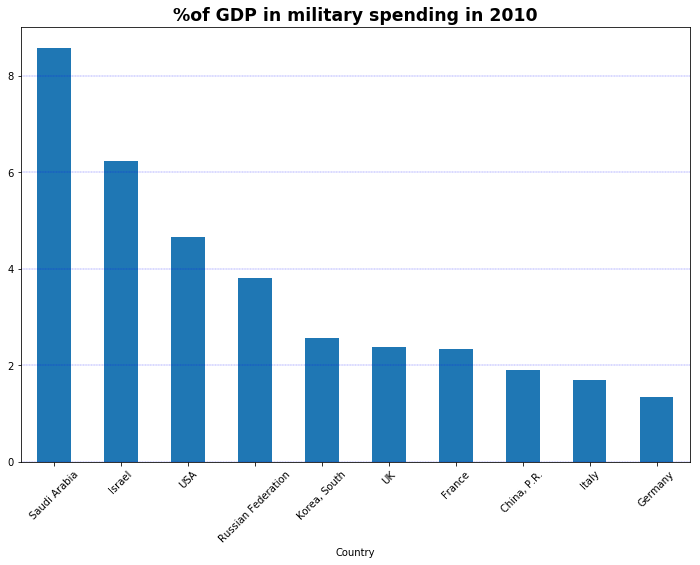

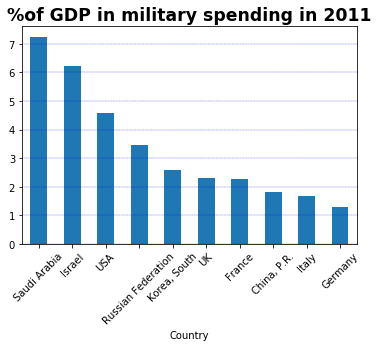

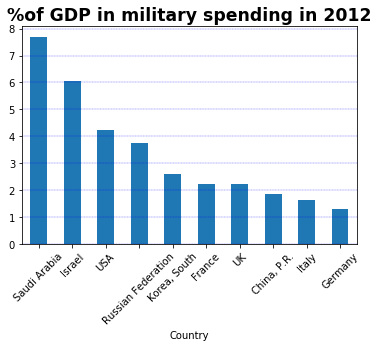

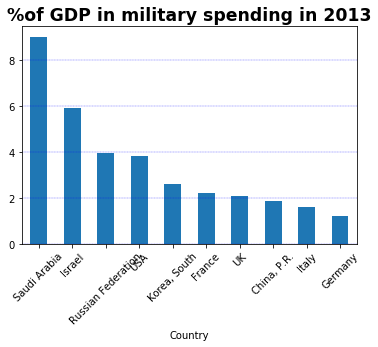

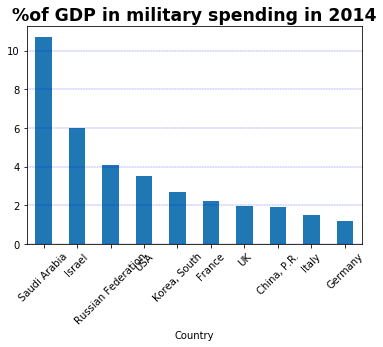

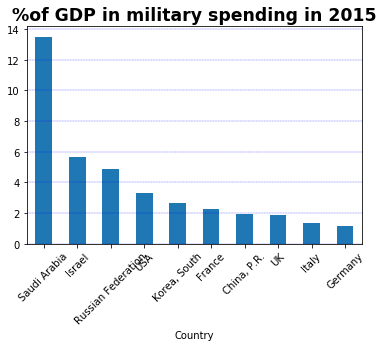

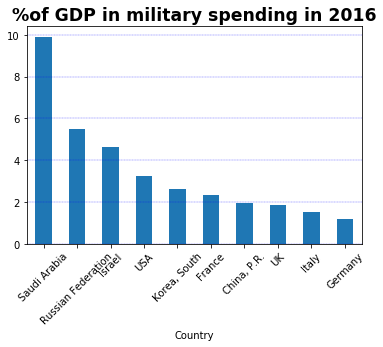

In [28]:
for i in df2.columns.values:
    df2=df2.sort_values(i,ascending=False)
    df2[i].plot(kind='bar')
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.xticks(rotation='45')
    plt.title('%of GDP in military spending in ' + str(i),fontsize='xx-large',fontweight="extra bold")
    plt.show()
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 6
    fig_size[1] = 4
    plt.rcParams["figure.figsize"] = fig_size

So the fluctuation of percentage invested by each country through the 6 years doesn't change the order of the countries that invest the most per year

In [29]:
df2[2016].sort_values(ascending=False)

Country
Saudi Arabia          9.90648
Russian Federation    5.50376
Israel                4.65413
USA                   3.22213
Korea, South          2.61832
France                2.32702
China, P.R.           1.93061
UK                    1.83868
Italy                 1.51768
Germany               1.19585
Name: 2016, dtype: object

# 3. Compare the military spending per capita to the  GDP per capita

Now for the  fourth DataFrame (Military spending per capita) the sheet named 'Per capita' will be used.

This sheet contains the following information 'Data for military expenditure per capita, in current US$, presented according to calender year. (1988-2017 only)'

* It is necessary to clean and arrange the data first.


In [37]:
df4ms=data.parse('Per capita',header=6)
df4ms.head(11)
type(df4ms)
df4ms=df4ms.drop(df4ms.iloc[:,1:24],axis=1)
df4ms.head()
df4ms=df4ms.set_index('Country')
#print(df4ms.index.values)
df4ms=df4ms.iloc[:,0:7]
df4ms=df4ms.loc[['USA','China, P.R.','USSR/Russia', 'Germany', 'UK', 'France', 'Italy', 'Saudi Arabia', 'Korea, South', 'Israel'
            ],:]
df4ms=df4ms.rename({'China, P.R.': 'China','USSR/Russia':'Russian Federation', 'UK':'United Kingdom','USA':'United States'
})
df4ms=df4ms.sort_index()
df4ms=df4ms.round(2)
print(type(df4ms[2013][1]))
df4ms.head(11)

<class 'float'>


,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,
China,85.0975,100.892,114.449,130.085,144.429,153.249,153.923
France,980.247,1019.85,943.358,976.489,991.01,858.587,886.245
Germany,571.799,594.81,573.246,565.194,565.749,487.256,507.595
Israel,1962.47,2156.03,2019.15,2212.25,2327.21,2103.43,1804.58
Italy,603.255,638.053,564.718,568.008,529.866,425.09,474.607
"Korea, South",568.588,623.016,639.646,680.43,745.299,722.833,727.172
Russian Federation,410.19,490.266,568.045,615.283,589.146,461.6,480.989
Saudi Arabia,1649.71,1718.64,1942.42,2238.14,2624.14,2762.79,1972.78
United Kingdom,917.481,944.502,910.434,879.653,910.286,823.618,731.418


A fifth DataFrame needs to be creates for GDP per capita.

This data comes from another dataset from the World Bank. 'WB_GDP_per_capita.xls' and the sheet name is 'Data'

The description provided by the World Bank is the following 'GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.'

* Cleaning the new data frame

In [38]:
data4GDP=pd.ExcelFile('WB_GDP_per_capita.xls')
df4GDP=data4GDP.parse('Data',header=3)
df4GDP.head(11)
df4GDP=df4GDP.set_index('Country Name')
df4GDP=df4GDP.drop(df4GDP.iloc[:,0:53],axis=1)
list(df4GDP.columns.values)
df4GDP=df4GDP.iloc[1:,0:7]
#print(df4GDP.index.values)
df4GDP=df4GDP.loc[['United States','China','Russian Federation', 'Germany', 'United Kingdom', 'France', 'Italy', 'Saudi Arabia', 'Korea, Rep.', 'Israel' ],:]
df4GDP=df4GDP.round(2)
df4GDP=df4GDP.rename({'Korea, Rep.': 'Korea, South'})
df4GDP=df4GDP.sort_index()
df4GDP=df4GDP.rename_axis({'2010':2010, '2011':2011, '2012':2012, '2013':2013, '2014':2014, '2015':2015, '2016':2016},axis=1)
df4GDP.head(11)

,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,
China,4560.51,5633.80,6337.88,7077.77,7683.50,8069.21,8117.27
France,40638.33,43790.74,40874.72,42592.95,43008.65,36613.38,36870.22
Germany,41785.56,46810.33,44065.25,46530.91,48042.56,41323.92,42232.57
Israel,30642.94,33689.84,32525.96,36291.23,37539.95,35690.96,37180.85
Italy,35849.37,38334.68,34814.13,35370.28,35396.67,30180.32,30668.98
"Korea, South",22086.95,24079.79,24358.78,25890.02,27811.37,27105.08,27608.25
Russian Federation,10674.99,14351.21,15434.57,16007.09,14125.91,9346.62,8759.04
Saudi Arabia,19259.59,23770.75,25303.09,24934.39,24575.40,20732.86,19982.09
United Kingdom,38893.02,41412.35,41790.78,42724.07,46783.47,44305.55,40412.03


* Concatenating the data to better observe the data frames

In [39]:
print(df4ms.columns)
print(df4GDP.columns)
df4=pd.concat({'Military spending ':df4ms,'GDP':df4GDP})
df4.head(20)

Index([2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='object')
Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64')


2010     2011     2012     2013  \
                   Country Name                                             
GDP                China               4560.51   5633.8  6337.88  7077.77   
                   France              40638.3  43790.7  40874.7  42592.9   
                   Germany             41785.6  46810.3  44065.2  46530.9   
                   Israel              30642.9  33689.8    32526  36291.2   
                   Italy               35849.4  38334.7  34814.1  35370.3   
                   Korea, South          22087  24079.8  24358.8    25890   
                   Russian Federation    10675  14351.2  15434.6  16007.1   
                   Saudi Arabia        19259.6  23770.8  25303.1  24934.4   
                   United Kingdom        38893  41412.3  41790.8  42724.1   
                   United States       48375.4  49793.7    51451  52782.1   
Military spending  China               85.0975  100.892  114.449  130.085   
                   France              980.247  1019.85  943.358  976.489   
                   Germany             571.799   594.81  573.246  565.194   
                   Israel              1962.47  2156.03  2019.15  2212.25   
                   Italy               603.255  638.053  564.718  568.008   
                   Korea, South        568.588  623.016  639.646   680.43   
                   Russian Federation   410.19  490.266  568.045  615.283   
                   Saudi Arabia        1649.71  1718.64  1942.42  2238.14   
                   United Kingdom      917.481  944.502  910.434  879.653   
                   United States       2262.11  2286.88  2185.45  2027.35   

                                          2014     2015     2016  
                   Country Name                                   
GDP                China                7683.5  8069.21  8117.27  
                   France              43008.7  36613.4  36870.2  
                   Germany             48042.6  41323.9  42232.6  
                   Israel              37539.9    35691  37180.8  
                   Italy               35396.7  30180.3    30669  
                   Korea, South        27811.4  27105.1  27608.2  
                   Russian Federation  14125.9  9346.62  8759.04  
                   Saudi Arabia        24575.4  20732.9  19982.1  
                   United Kingdom      46783.5  44305.6    40412  
                   United States       54696.7  56443.8  57588.5  
Military spending  China               144.429  153.249  153.923  
                   France               991.01  858.587  886.245  
                   Germany             565.749  487.256  507.595  
                   Israel              2327.21  2103.43  1804.58  
                   Italy               529.866   425.09  474.607  
                   Korea, South        745.299  722.833  727.172  
                   Russian Federation  589.146    461.6  480.989  
                   Saudi Arabia        2624.14  2762.79  1972.78  
                   United Kingdom      910.286  823.618  731.418  
                   United States       1919.67  1863.24  1862.65

* Plotting the data frames it can be appreciated how the military spending per capita represents a low amount compared to the GDP. But with help of some other plots it can be better observed.

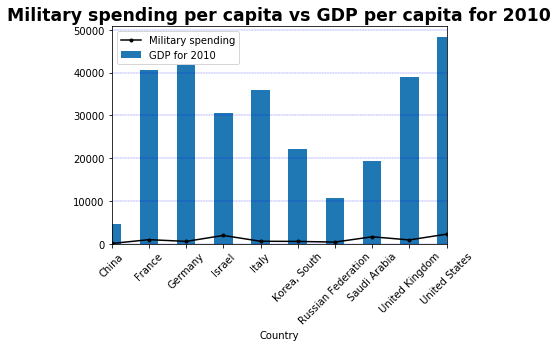

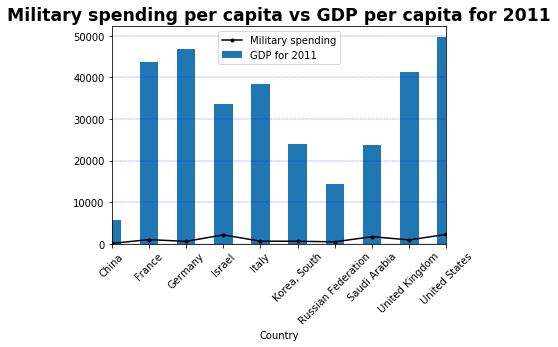

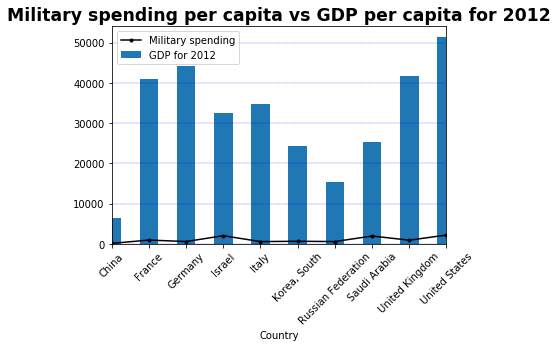

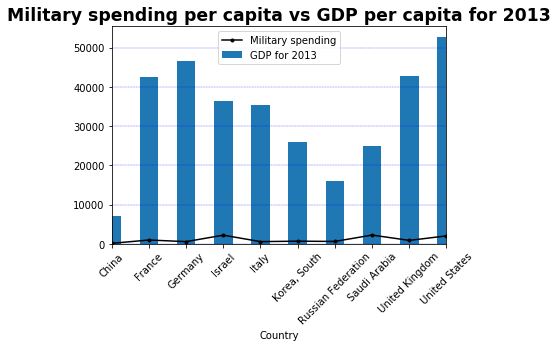

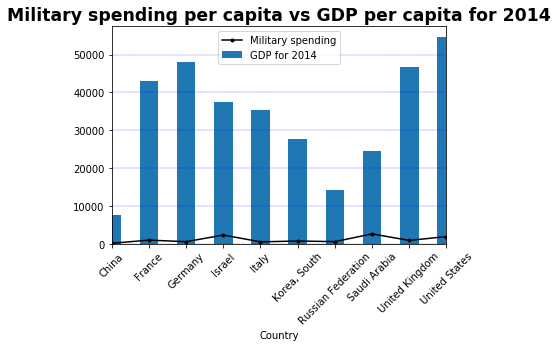

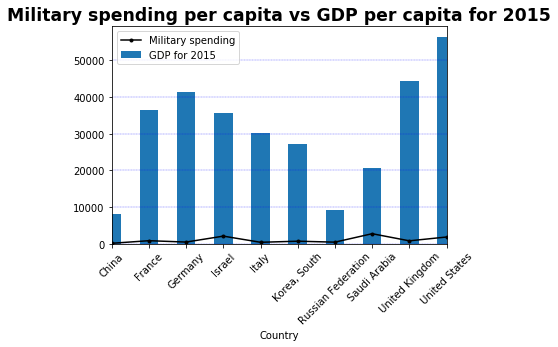

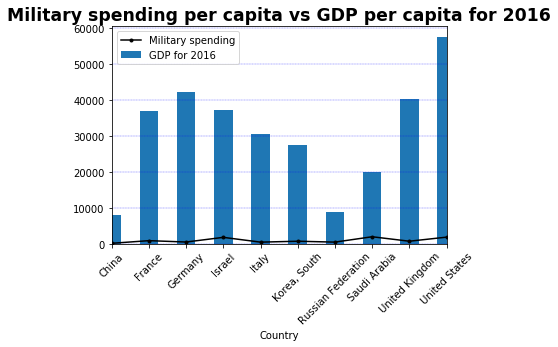

In [40]:

for i in df4GDP.columns.values:
    fig, ax = plt.subplots()
    df4GDP[i].plot(kind='bar',label='GDP for '+ str(i))
    df4ms[i].plot(label="Military spending",marker='.',color='black')
    ax.legend()
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.xticks(rotation='45')
    plt.title('Military spending per capita vs GDP per capita for ' + str(i),fontsize='xx-large',fontweight="extra bold")
    plt.show()
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 6
    fig_size[1] = 4
    plt.rcParams["figure.figsize"] = fig_size

* If plotting by country, it is too difficult to really appreciate the fluctuation of the military spending of each country through 2010-2016 because GDP is much higher.

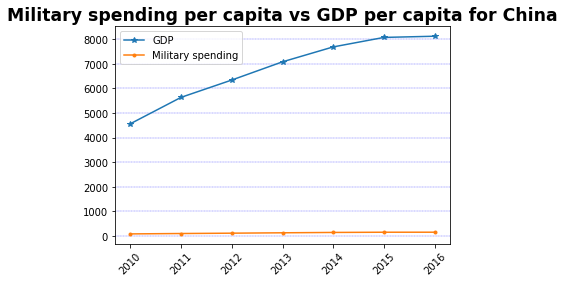

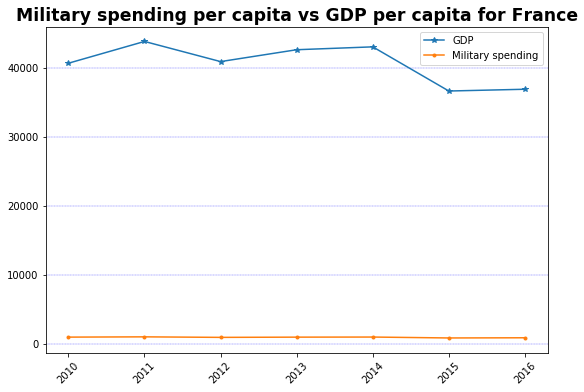

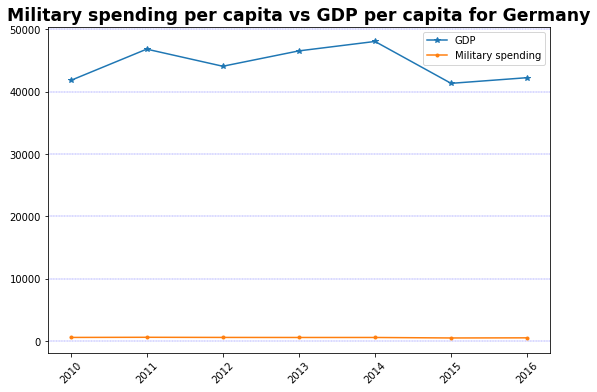

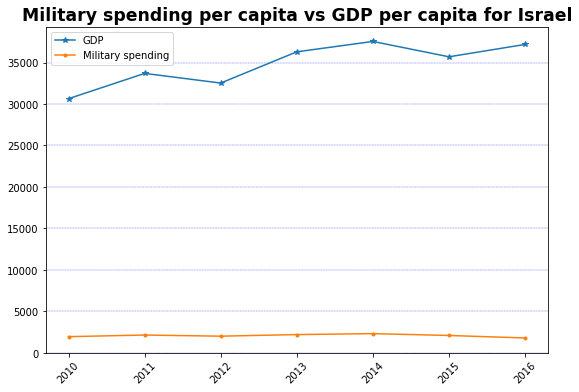

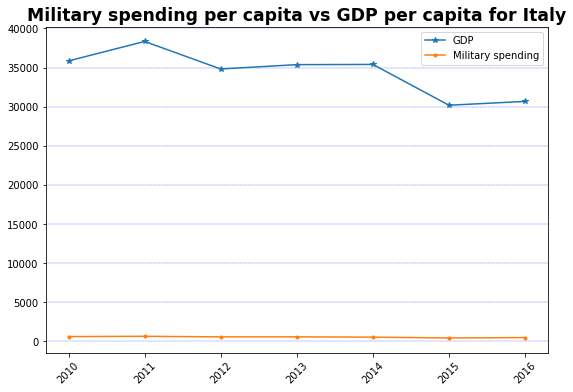

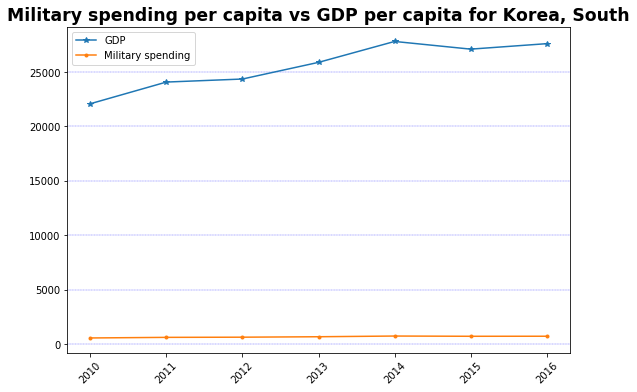

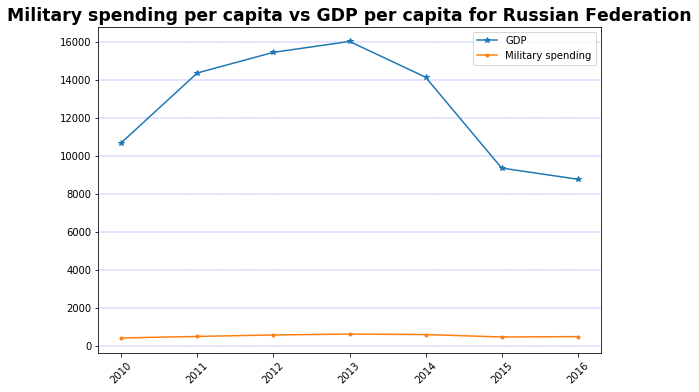

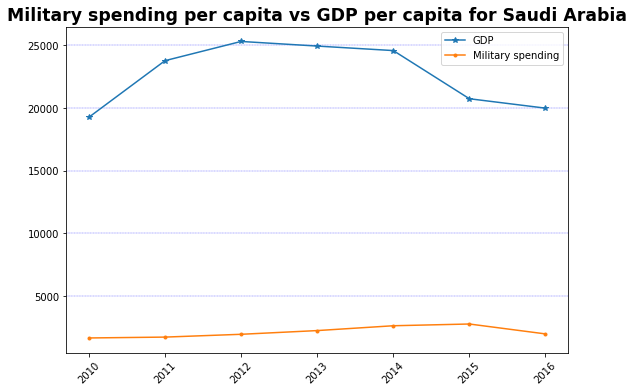

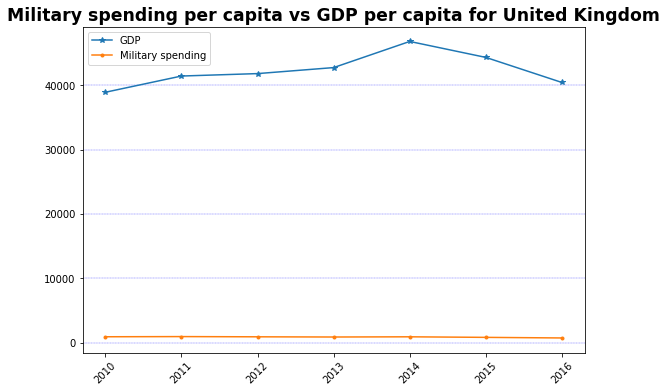

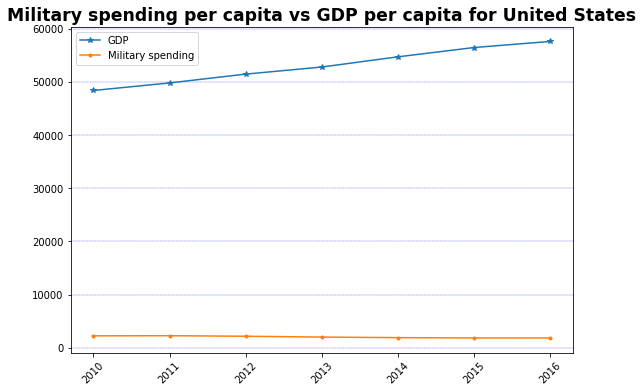

In [41]:
for i in df4GDP.index.values:
    fig, ax = plt.subplots()
    ax.plot(df4GDP.loc[str(i)], label="GDP",marker='*')
    ax.plot(df4ms.loc[str(i)], label="Military spending",marker='.')
    ax.legend()
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.xticks(rotation='45')
    plt.title('Military spending per capita vs GDP per capita for ' + str(i),fontsize='xx-large',fontweight="extra bold")
    plt.show()
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 9
    fig_size[1] = 6
    plt.rcParams["figure.figsize"] = fig_size

* Percentage of military spendng per capita of GDP per capita

In [42]:
df4GDPmsptg=df4ms*100/df4GDP
#df4GDPmsptg
df4GDPmsptg[2016].sort_values(ascending=False)

Country
Saudi Arabia          9.87274
Russian Federation    5.49134
Israel                4.85351
United States          3.2344
Korea, South          2.63389
France                2.40369
China                 1.89624
United Kingdom         1.8099
Italy                 1.54751
Germany                1.2019
Name: 2016, dtype: object

In [43]:
df4GDP[2016].sort_values(ascending=False)

Country Name
United States         57588.54
Germany               42232.57
United Kingdom        40412.03
Israel                37180.85
France                36870.22
Italy                 30668.98
Korea, South          27608.25
Saudi Arabia          19982.09
Russian Federation     8759.04
China                  8117.27
Name: 2016, dtype: float64

In [44]:
df4ms[2016].sort_values(ascending=False)

Country
Saudi Arabia          1972.78
United States         1862.65
Israel                1804.58
France                886.245
United Kingdom        731.418
Korea, South          727.172
Germany               507.595
Russian Federation    480.989
Italy                 474.607
China                 153.923
Name: 2016, dtype: object

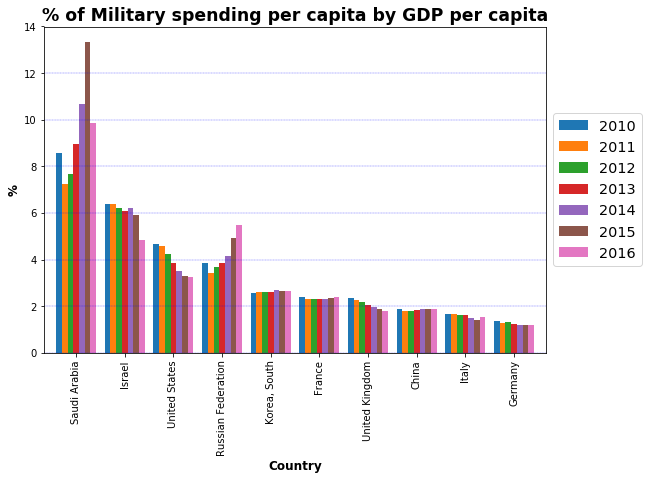

In [45]:
df4GDPmsptg=df4GDPmsptg.sort_values(2010, ascending=False)
df4GDPmsptg.plot(kind='bar',stacked=False,sort_columns=True,width=0.82)
plt.title('% of Military spending per capita by GDP per capita',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.ylabel('%',fontsize='large',fontweight="bold")
plt.xlabel('Country',fontsize='large',fontweight="bold")
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.figure()
plt.show()
#df4.index.values
fig_size = plt.rcParams["figure.figsize"]
#print(fig_size) #[6.0,4.0]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

The results are similar to the ones from the military spending in terms of percentage of GDP, showing Saudi Arabia with almost 14% by 2015. This last bar plot guides to a better understanding of what happened for each country's investement in military spending based on their GDP of that year.

For example it is appreciated how Germany has the lowest investment of their GDP in military spending. also how the Russian Federation and Saudi Arabia had been increasing their percentage of investement until 2016 when Saudi Arabia decreased about 4%.

# 4. Single out the fastest growing countries in military spending in fixed value and in percentage

The last question uses the same data frame from the first question.

* Plot of the Military spending in fixed values

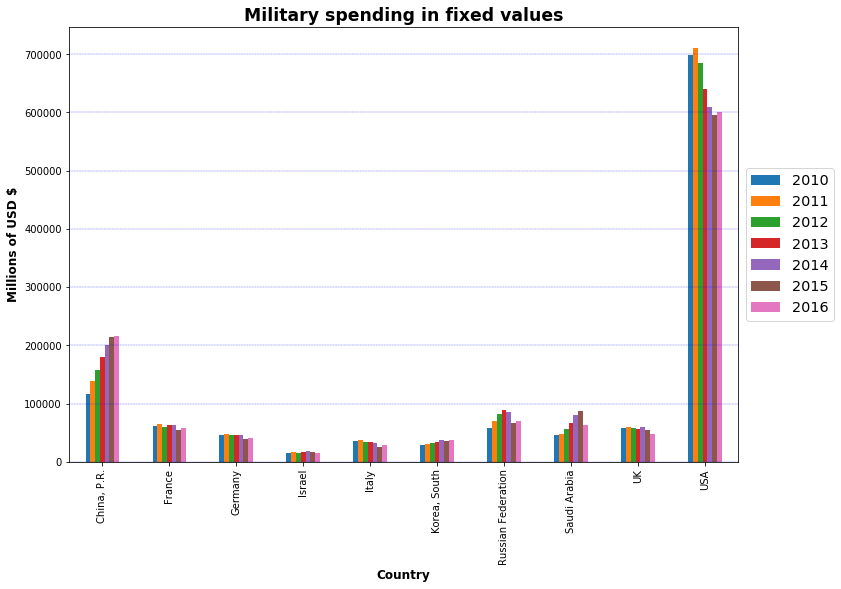

In [46]:
df1.head(11)
plt.figure()
df1.plot(kind='bar')
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.title('Military spending in fixed values',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.ylabel('Millions of USD $',fontsize='large',fontweight="bold")
plt.xlabel('Country',fontsize='large',fontweight="bold")
plt.show()

* Calculating the differences between the military spending one year and the previous year.
* Calculating the total increase by taking the difference from 2016 and 2010 military spending

In [47]:
df1_growth=pd.DataFrame(columns=['2011-2010','2012-2011','2013-2012','2014-2013','2015-2014','2016-2015'])
df1_growth['2011-2010']=df1[2011]-df1[2010]
df1_growth['2012-2011']=df1[2012]-df1[2011]
df1_growth['2013-2012']=df1[2013]-df1[2012]
df1_growth['2014-2013']=df1[2014]-df1[2013]
df1_growth['2015-2014']=df1[2015]-df1[2014]
df1_growth['2016-2015']=df1[2016]-df1[2015]
total_increase=pd.DataFrame(columns=['total increase'])
total_increase['total increase']=df1[2016]-df1[2010]
total_increase=total_increase.sort_values('total increase',ascending=False)
total_increase
#df1_growth.head(10)

,total increase
Country,
"China, P.R.",100319
Saudi Arabia,18428.3
Russian Federation,10525.1
"Korea, South",8759.27
Israel,209.597
France,-4423.33
Germany,-4676.03
Italy,-7826.44
UK,-9963.91


* Plotting the military spending total increase by year from 2010 to 2016.

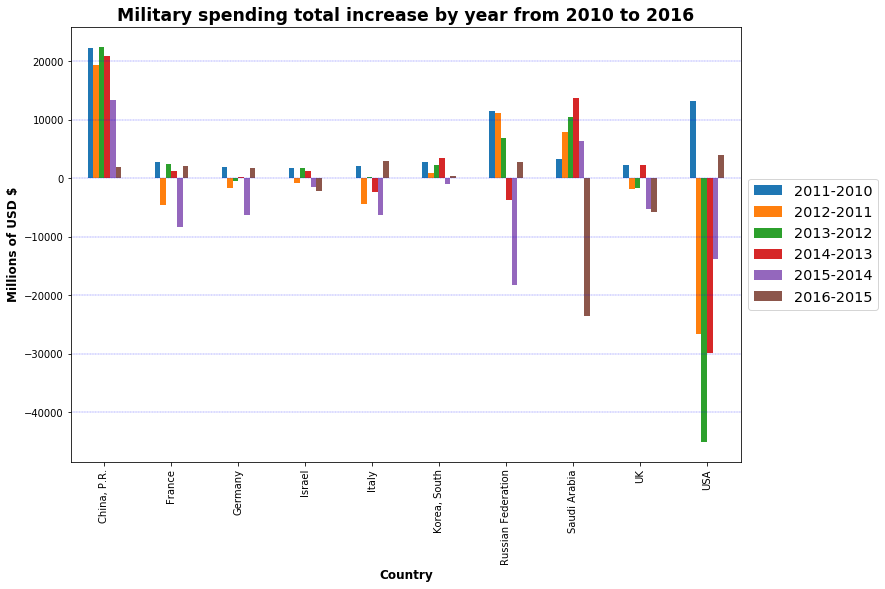

In [48]:
plt.figure()
df1_growth.plot(kind='bar')
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.title('Military spending total increase by year from 2010 to 2016',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.ylabel('Millions of USD $',fontsize='large',fontweight="bold")
plt.xlabel('Country',fontsize='large',fontweight="bold")
plt.show()

fig_size = plt.rcParams["figure.figsize"]
#print(fig_size) #[6.0,4.0]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

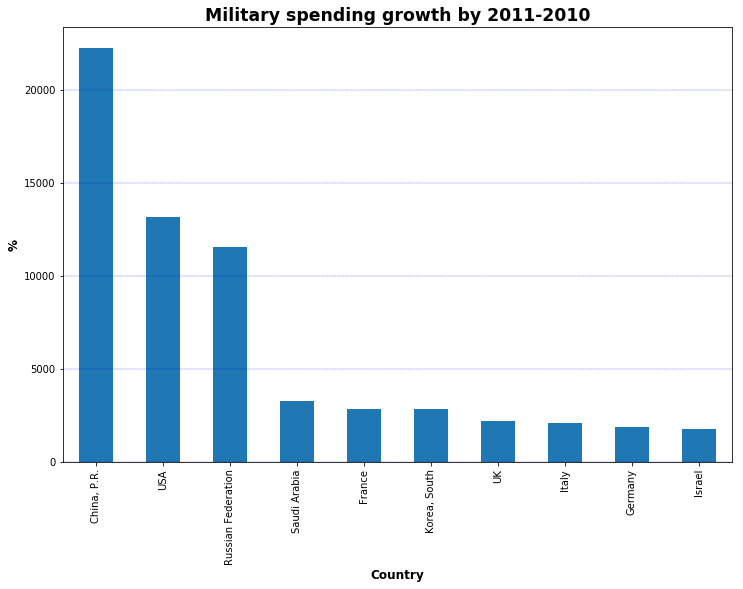

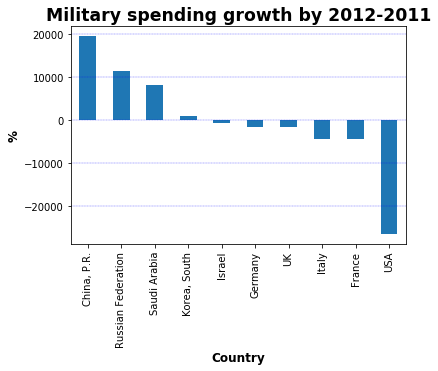

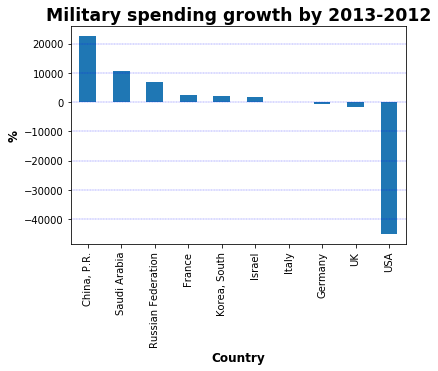

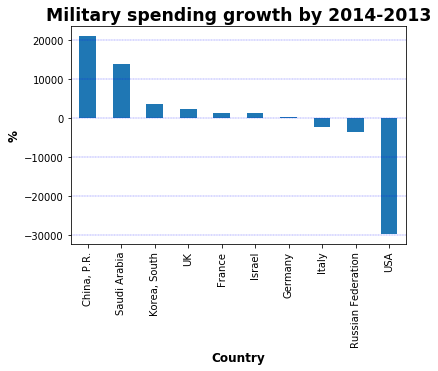

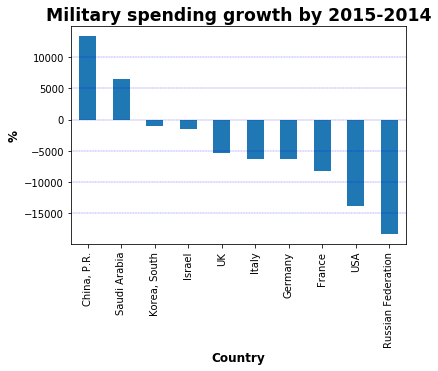

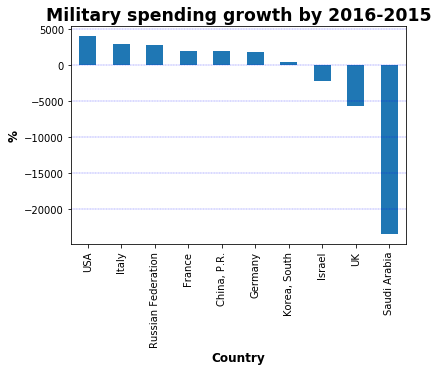

In [49]:
for year in df1_growth.columns.values:
    df1_growth=df1_growth.sort_values(year,ascending=False)
    df1_growth[year].plot(kind='bar')
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.title('Military spending growth by '+str(year),fontsize='xx-large',fontweight="extra bold")
    plt.ylabel('%',fontsize='large',fontweight="bold")
    plt.xlabel('Country',fontsize='large',fontweight="bold")
    plt.show()
    fig_size = plt.rcParams["figure.figsize"]
    #print(fig_size) #[6.0,4.0]
    fig_size[0] = 6
    fig_size[1] = 4
    plt.rcParams["figure.figsize"] = fig_size

It is important to see how the fluctuaation of each country could be related with the goverment in charge at that year. USA for example was decreasing their investement but from 2015 to 2016 increased it. China for example is the only country of the ten being analyzed that each year increases.

* Plotting the total increase by country

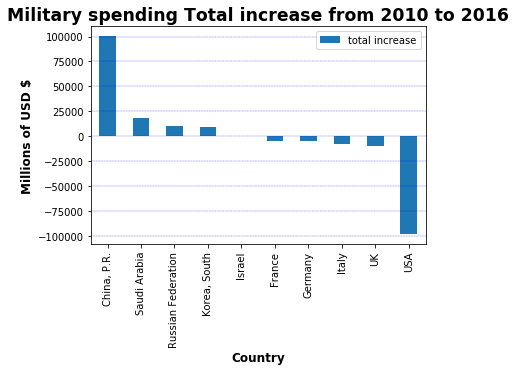

In [50]:
plt.figure()
total_increase.plot(kind='bar')
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.title('Military spending Total increase from 2010 to 2016',fontsize='xx-large',fontweight="extra bold")
plt.ylabel('Millions of USD $',fontsize='large',fontweight="bold")
plt.xlabel('Country',fontsize='large',fontweight="bold")
plt.show()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

It is appreciated how China, South Korea, the Russian Federation and Saudi Arabia have increased while the other countries have decreased.

While it can be seen how the Russian Federation has increased almost the same that the USA has decreased, it is important to remember from the other plots that USA's investement was much higher than the one from the rest of the countries.

* Calculating the percentages

In [51]:
df1_growth_percent=pd.DataFrame(columns=['2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016'])
df1_growth_percent['2010-2011']=(df1[2011]-df1[2010])*100/df1[2010]
df1_growth_percent['2011-2012']=(df1[2012]-df1[2011])*100/df1[2011]
df1_growth_percent['2012-2013']=(df1[2013]-df1[2012])*100/df1[2012]
df1_growth_percent['2013-2014']=(df1[2014]-df1[2013])*100/df1[2013]
df1_growth_percent['2014-2015']=(df1[2015]-df1[2014])*100/df1[2012]
df1_growth_percent['2015-2016']=(df1[2016]-df1[2015])*100/df1[2015]
df1_growth_percent.sort_values('2010-2011',ascending=False)

,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Country,,,,,,
Russian Federation,19.6138,15.9913,8.44918,-4.13839,-22.4352,4.25573
"China, P.R.",19.2336,14.078,14.2894,11.6142,8.46358,0.905312
Israel,11.9763,-4.73599,11.2992,6.81349,-9.76399,-12.8539
"Korea, South",9.99648,3.09777,6.83805,10.0059,-3.072,0.994453
Saudi Arabia,7.26364,16.4162,18.6239,20.5049,11.3694,-26.9689
Italy,5.82173,-11.5322,0.471826,-6.84373,-18.6104,11.5092
France,4.56313,-7.06766,3.96758,1.91689,-13.7777,3.64331
Germany,4.07481,-3.46794,-1.16273,0.374767,-13.5356,4.43809
UK,3.76632,-2.94469,-2.79319,4.082,-9.09584,-10.6628


* Plot of the percentage of growth from one year to another through 2010-2016

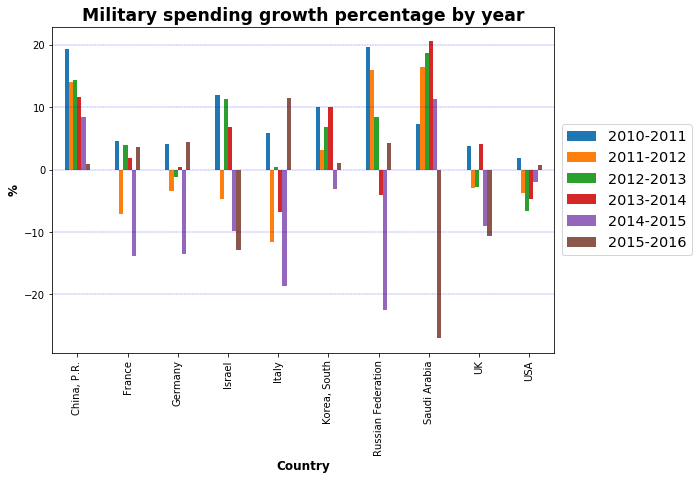

In [52]:
plt.figure()
df1_growth_percent.plot(kind='bar')
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.title('Military spending growth percentage by year',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.ylabel('%',fontsize='large',fontweight="bold")
plt.xlabel('Country',fontsize='large',fontweight="bold")
plt.show()

fig_size = plt.rcParams["figure.figsize"]
#print(fig_size) #[6.0,4.0]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

* A more precise view by ploting the percentage change from each year

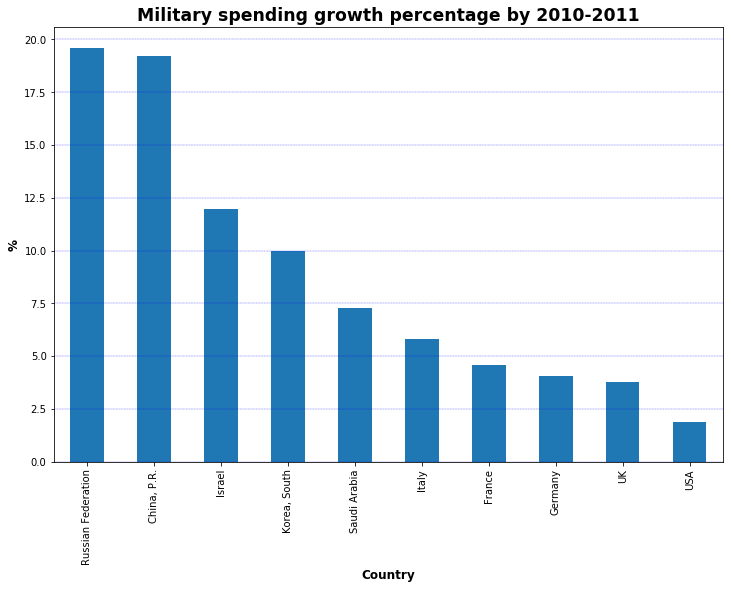

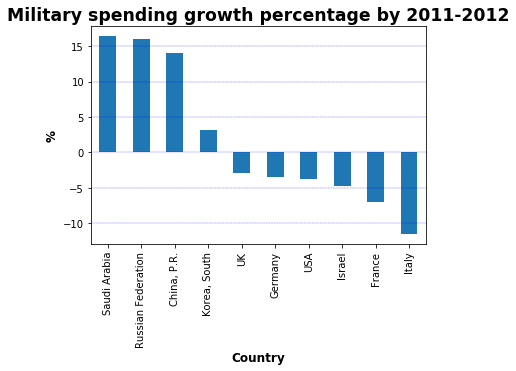

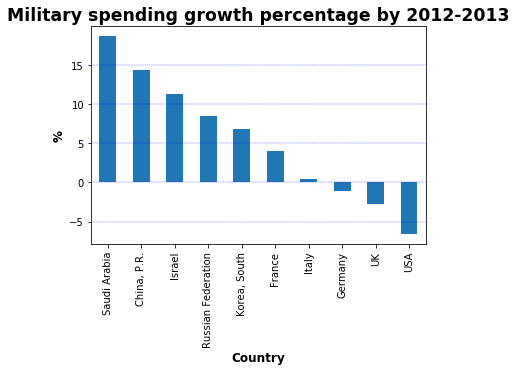

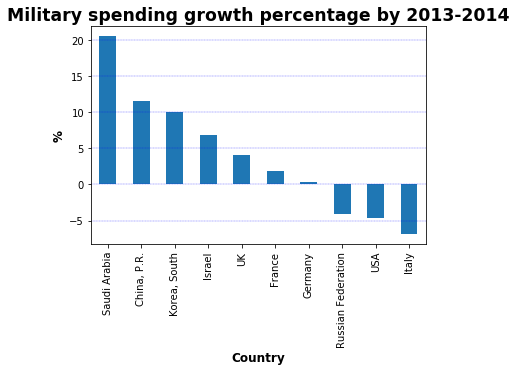

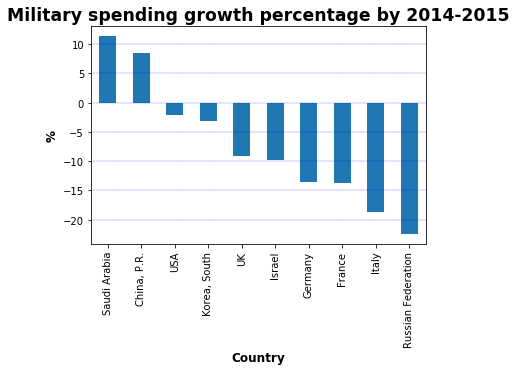

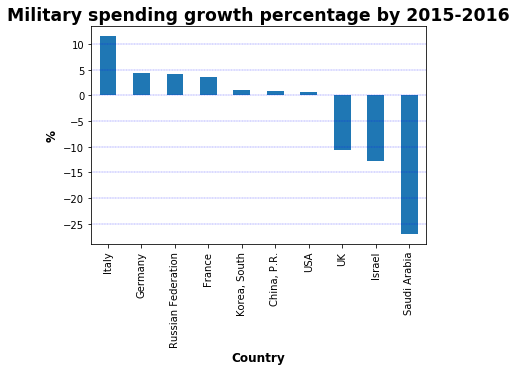

In [53]:
plt.figure()

for year in df1_growth_percent.columns.values:
    df1_growth_percent= df1_growth_percent.sort_values(year,ascending=False)
    df1_growth_percent[year].plot(kind='bar')
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.title('Military spending growth percentage by '+ str(year),fontsize='xx-large',fontweight="extra bold")
    plt.ylabel('%',fontsize='large',fontweight="bold")
    plt.xlabel('Country',fontsize='large',fontweight="bold")
    plt.show()
    fig_size = plt.rcParams["figure.figsize"]
    #print(fig_size) #[6.0,4.0]
    fig_size[0] = 6
    fig_size[1] = 4
    plt.rcParams["figure.figsize"] = fig_size

It is important to remark that in 2010-2011 was the only period when all ten countries increased their investement, and in 2014-2015 almost all decreased their investement except China that hasn't decreased from 2010 to 2016 and Saudi Arabia that increased a 10%

* Calculating the total percentage of growth from 2010 to 2016

In [54]:
total_percent=pd.DataFrame(columns=['total increase percent'])
total_percent['total increase percent']=(df1[2016]-df1[2010])*100/df1[2010]
total_percent=total_percent.sort_values('total increase percent',ascending=False)
total_percent

,total increase percent
Country,
"China, P.R.",86.6977
Saudi Arabia,40.7304
"Korea, South",31.0886
Russian Federation,17.9241
Israel,1.43824
France,-7.15961
Germany,-10.1091
USA,-14.047
UK,-17.1546


* Plot of the total percentage of growth from 2010-2016

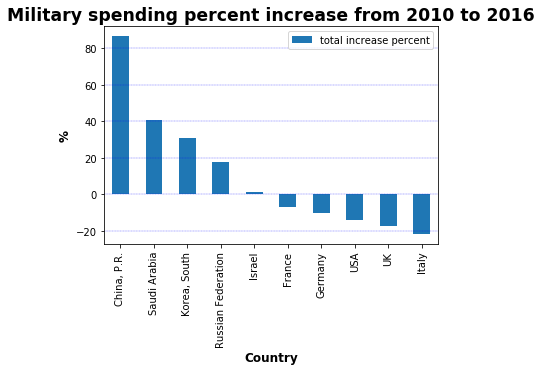

In [55]:
plt.figure()
total_percent.plot(kind='bar')
#df1[2016].plot(kind='bar',label='Military spending total increase from 2010 to 2016')
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.title('Military spending percent increase from 2010 to 2016',fontsize='xx-large',fontweight="extra bold")
plt.ylabel('%',fontsize='large',fontweight="bold")
plt.xlabel('Country',fontsize='large',fontweight="bold")
#plt.legend(([df4ms[2010],df4GDP[2010]],['Military spending','GDP']))
plt.show()

fig_size = plt.rcParams["figure.figsize"]
    #print(fig_size) #[12.0,8.0]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

It is impressive how China has increased almost 80% in military spenging from 2010 to 2016 followed by Saudi Arabia by 40% and in third place South Korea with about 30%.

Italy has decreased about 20% followed by UK with 17% and USA with 14%.

# Some conclusions

USA has the biggest amount of USD in military spending but compared to it's GDP it has been around 4% from 2010-2016 and has decreased its growth in military spending about 14%. 

While other countries like Saudi Arabia reached almost the 14% of their GDP in military spending and that same year was the third in the list of ten countries with bigger investement in military spending and a growth of about 40% from 2010-2016. Saudi Arabia is also the country that invest more from their GDP per capita in military spending per capita.

China spends less than its 2% of GDP in military spending but is second in the countries with most USD in military spending and has grown about 80% from 2010 to 2016.

Israel will keep at the end of the military spending board because of their low GDP and % of spending in military. Also because their percentage of growth is already low.